# Melanoma Detection Assignment - Convolutional Neural Networks

## Introduction 

In this programming assignment I built a CNN model to detect melanoma in a pictures dataset.

This repository contains the following file required by the assignment:

* Jupyter Notebook file with the Data Preparation and Model Building to detect Melanoma.

## Methods Used

* Python
* Pandas
* Numpy
* matplotlib
* TensorFlow
* Google Colab (Jupyter Notebooks)

## Download and Setup

This project needs Jupyter Notebook with TensorFlow libraries.

* For more details about the instalation in Anaconda, go to:  https://docs.anaconda.com/anaconda/install/index.html

* Or use a Google Colab notebook to avoid manual libraries installation: https://colab.research.google.com/.

### How to Run

You can download the source code cloning this repository using Git:

1. Open your favorite Terminal app (Unix, Linux or Macos), such as Terminal, Command, Console, iTerm2, so on.

2. Clone the repository

```
git clone https://github.com/dicotips/Melanoma_Detection_Assignment_CNN.git
```

3. Open the ** *.ipynb** notebook file in Anaconda.

```
jupyter notebook Jheser_Guzman_CNN.ipynb
```

## Problem Statement

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

## Importing all the important libraries

### TODO: Installing TensorFlow

In [ ]:
!pip install tensorflow

In [ ]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import shutil
import PIL
from glob import glob

# TensorFlow Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Rescaling, InputLayer

### Import Colab Library to load Dataset from Google Drive

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Load from Google Drive

In [ ]:
# Defining the path for train and test images
DRIVE_PATH = '/content/drive/MyDrive/'
DATASET_FOLDER = '_CNN_Assignment_Dataset/Skin cancer ISIC The International Skin Imaging Collaboration'
DATASET_PATH = DRIVE_PATH + DATASET_FOLDER
data_dir_train = pathlib.Path(DATASET_PATH + "/Train")
data_dir_test = pathlib.Path(DATASET_PATH + "/Test")

In [ ]:
print("Size of TRAIN dataset: " + str(len(list(data_dir_train.glob('*/*.jpg')))))
print("Size of TRAIN dataset: " + str(len(list(data_dir_test.glob('*/*.jpg')))))

Size of TRAIN dataset: 2239
Size of TRAIN dataset: 118


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

### Cusotm Functions to be used in during the Notebook

In [ ]:
# Custom function to plot metrics
def plot_metrics(history, epochs=20):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

In [ ]:
# Custom function to remove output files
def remove_output_files():
  class_names = ['pigmented benign keratosis', 
                'melanoma', 
                'basal cell carcinoma', 
                'nevus', 
                'squamous cell carcinoma', 
                'vascular lesion', 
                'actinic keratosis', 
                'dermatofibroma', 
                'seborrheic keratosis']
  data_dir_train = pathlib.Path(DATASET_PATH + "/Train")
  for i in class_names:
    dir_path = str(data_dir_train) + '/' + str(i)+'/output'
    try:
        shutil.rmtree(dir_path)
    except OSError as e:
        print("Error: %s : %s" % (dir_path, e.strerror))

remove_output_files()

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
tf.keras.utils.image_dataset_from_directory(data_dir_train,
                                            validation_split = 0.2,
                                            subset="training",
                                            seed=123,
                                            image_size=(img_height, img_width),
                                            batch_size=batch_size)

Found 9000 files belonging to 9 classes.
Using 7200 files for training.


<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory( data_dir_train,
                                                        label_mode="int",
                                                        validation_split=0.2,
                                                        subset="training",
                                                        seed=123,
                                                        image_size=(img_height, img_width),
                                                        batch_size=batch_size)

Found 9000 files belonging to 9 classes.
Using 7200 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory( data_dir_train,
                                                      validation_split=0.2,
                                                      label_mode="int",
                                                      subset="validation",
                                                      seed=123,
                                                      image_size=(img_height, img_width),
                                                      batch_size=batch_size)

Found 9000 files belonging to 9 classes.
Using 1800 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
for i in class_names:
  print(i,": ",len(list(data_dir_train.glob('{}/*.jpg'.format(i)))))

actinic keratosis :  114
basal cell carcinoma :  376
dermatofibroma :  95
melanoma :  438
nevus :  357
pigmented benign keratosis :  462
seborrheic keratosis :  77
squamous cell carcinoma :  181
vascular lesion :  139


### Visualize the data
#### TODO: Create a code to visualize one instance of all the nine classes present in the dataset

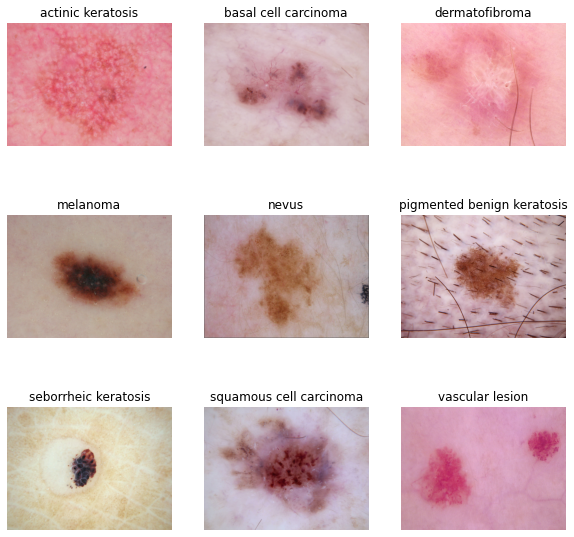

In [ ]:
plt.figure(figsize=(10,10))
for index,images in enumerate(class_names):
  temp = plt.imread(list(data_dir_train.glob('{}/*.jpg'.format(images)))[0])
  
  plt.subplot(3,3,index+1)
  plt.imshow(temp)
  plt.axis('off')
  plt.title(images)

In [ ]:
images, labels= next(iter(train_ds))
print(images.shape)
print(labels.shape)

(32, 180, 180, 3)
(32,)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255),
    layers.RandomFlip("horizontal"),
    
    layers.RandomZoom(0.5),
    layers.RandomCrop(180,180)
  #layers.RandomRotation(90)
])

In [ ]:
temp=resize_and_rescale(images)

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
 layers.RandomZoom(height_factor=(-.5,0))
])

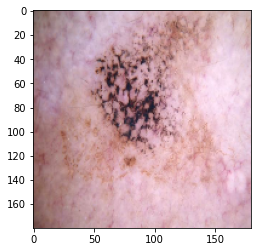

In [ ]:
plt.imshow(images[1].numpy().astype('uint8'))


In [ ]:
# data_augmentation(images[0])

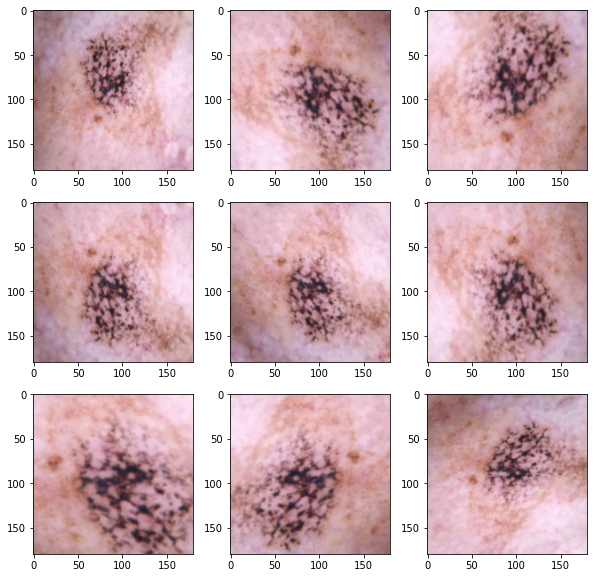

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(images[1])
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image.numpy().astype('uint8'))
#   plt.axis("off")

### Create the model
#### TODO: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Normalize Layer
normalization_layer = tf.keras.layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

In [ ]:
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.121079095 0.8511437


### Model 1 - Vanilla Model

In [ ]:
model=Sequential()
model.add(InputLayer((180,180,3)))
model.add(Rescaling(1./255))

model.add(Conv2D(32, 3, activation='relu',padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, activation='relu',padding='same'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(9, activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### TODO, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 129600)           

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
225/225 [==============================] - 31s 130ms/step - loss: 2.0363 - accuracy: 0.3046 - val_loss: 1.6298 - val_accuracy: 0.3789
Epoch 2/20
225/225 [==============================] - 21s 91ms/step - loss: 1.3352 - accuracy: 0.4896 - val_loss: 1.2007 - val_accuracy: 0.5644
Epoch 3/20
225/225 [==============================] - 21s 92ms/step - loss: 1.0138 - accuracy: 0.6313 - val_loss: 1.0128 - val_accuracy: 0.6394
Epoch 4/20
225/225 [==============================] - 21s 92ms/step - loss: 0.7616 - accuracy: 0.7343 - val_loss: 0.7646 - val_accuracy: 0.7117
Epoch 5/20
225/225 [==============================] - 20s 91ms/step - loss: 0.5423 - accuracy: 0.8072 - val_loss: 0.8434 - val_accuracy: 0.6972
Epoch 6/20
225/225 [==============================] - 21s 92ms/step - loss: 0.3957 - accuracy: 0.8622 - val_loss: 0.5565 - val_accuracy: 0.8056
Epoch 7/20
225/225 [==============================] - 21s 92ms/step - loss: 0.2943 - accuracy: 0.8953 - val_loss: 0.5185 - val_accuracy

### Visualizing training results

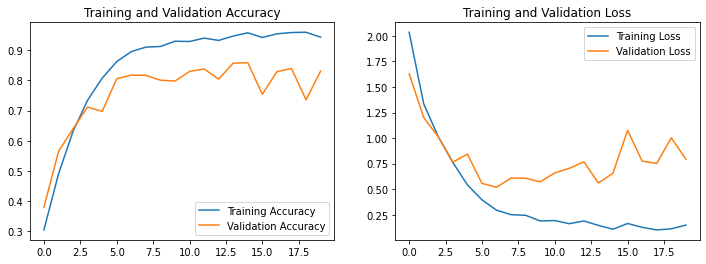

In [ ]:
plot_metrics(history)

#### TODO: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

We observe that Model 1 overfits the data exteremly. We need to resolve the issue of overfitting with several techniques. I.e Dropout, Data Augmentation, and Batch Normalization,


In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_aug = ImageDataGenerator(rescale=1./255,
                               horizontal_flip=True,
                               zoom_range=0.2)

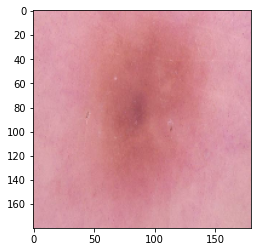

In [ ]:
image_batch,label_batch = next(iter(train_ds))
temp=image_batch[0].numpy()
plt.imshow(temp.astype('uint8'))

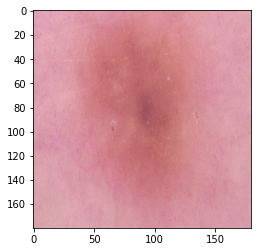

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.imshow(image_aug.apply_transform(temp,transform_parameters={'flip_horizontal':True}).astype('uint8'))

### Model 2 with Dropout layers

### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model_dp = Sequential()

model_dp.add(InputLayer((180,180,3)))
model_dp.add(Rescaling(1./255))

model_dp.add(Conv2D(32, 3, activation='relu',padding='same'))
model_dp.add(MaxPooling2D())

model_dp.add(Conv2D(64, 3, activation='relu',padding='same'))
model_dp.add(MaxPooling2D())
model_dp.add(Dropout(0.20))

model_dp.add(Flatten())
model_dp.add(Dense(256, activation='relu'))
model_dp.add(Dropout(0.20))

model_dp.add(Dense(9, activation='softmax'))

In [ ]:
# View the summary of all layers
model_dp.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 45, 45, 64)       

### Compiling the model

In [ ]:
#choose an appropirate optimiser and loss function
model_dp.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history_dp = model_dp.fit(
                            train_ds,
                            validation_data=val_ds,
                            epochs=epochs
                         )

Epoch 1/20
225/225 [==============================] - 18s 78ms/step - loss: 1.9687 - accuracy: 0.3454 - val_loss: 1.3897 - val_accuracy: 0.4667
Epoch 2/20
225/225 [==============================] - 17s 78ms/step - loss: 1.2204 - accuracy: 0.5578 - val_loss: 1.1040 - val_accuracy: 0.6028
Epoch 3/20
225/225 [==============================] - 18s 78ms/step - loss: 0.9149 - accuracy: 0.6790 - val_loss: 0.8963 - val_accuracy: 0.6878
Epoch 4/20
225/225 [==============================] - 18s 78ms/step - loss: 0.7043 - accuracy: 0.7614 - val_loss: 0.7245 - val_accuracy: 0.7533
Epoch 5/20
225/225 [==============================] - 18s 78ms/step - loss: 0.5428 - accuracy: 0.8122 - val_loss: 0.7277 - val_accuracy: 0.7583
Epoch 6/20
225/225 [==============================] - 17s 78ms/step - loss: 0.4886 - accuracy: 0.8364 - val_loss: 0.7496 - val_accuracy: 0.7539
Epoch 7/20
225/225 [==============================] - 17s 78ms/step - loss: 0.3815 - accuracy: 0.8737 - val_loss: 0.5439 - val_accuracy:

### Visualizing the results

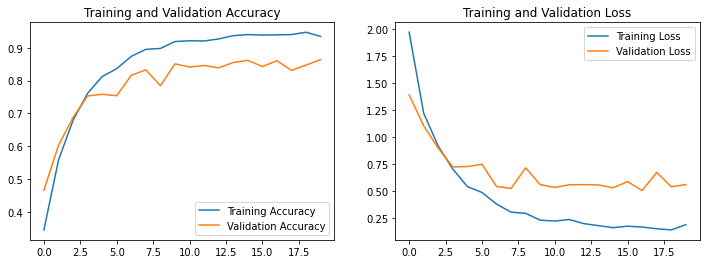

In [ ]:
plot_metrics(history_dp)

#### TODO: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Obervation: We have reduced the overfitting problem slighlty. However, There is no significant improvement with Model 2 in comparison to Model 1. We assume the issue to be Lower Amount of Data and Class Imbalance.

#### Find the distribution of classes in the training dataset.

#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
for i in class_names:
  print(i,": ",len(list(data_dir_train.glob('{}/*.jpg'.format(i)))))

actinic keratosis :  114
basal cell carcinoma :  376
dermatofibroma :  95
melanoma :  438
nevus :  357
pigmented benign keratosis :  462
seborrheic keratosis :  77
squamous cell carcinoma :  181
vascular lesion :  139


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
- 'seborrheic keratosis' class has the least number of samples.

#### - Which classes dominate the data in terms proportionate number of samples?
- 'pigmented benign keratosis' classes dominate the data in terms proportionate number of samples

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
print(path_list)

lesion_list = list()

#for [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
for i in glob(os.path.join(data_dir_train, '*', '*.jpg')):
  base_dir_name = os.path.dirname(i)
  #print(base_dir_name)
  lesion_list.append(os.path.basename(base_dir_name))

#print(lesion_list)

['/content/drive/MyDrive/_CNN_Assignment_Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000141.jpg', '/content/drive/MyDrive/_CNN_Assignment_Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000139.jpg', '/content/drive/MyDrive/_CNN_Assignment_Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000143.jpg', '/content/drive/MyDrive/_CNN_Assignment_Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000144.jpg', '/content/drive/MyDrive/_CNN_Assignment_Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000142.jpg', '/content/drive/MyDrive/_CNN_Assignment_Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000166.jpg', '/content/drive/MyDrive/_CNN_Assignment_Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_00002

In [ ]:
dataframe_dict = dict(zip(path_list, lesion_list))

original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/_CNN_Assignment_Dataset...,melanoma
1,/content/drive/MyDrive/_CNN_Assignment_Dataset...,melanoma
2,/content/drive/MyDrive/_CNN_Assignment_Dataset...,melanoma
3,/content/drive/MyDrive/_CNN_Assignment_Dataset...,melanoma
4,/content/drive/MyDrive/_CNN_Assignment_Dataset...,melanoma
...,...,...
2234,/content/drive/MyDrive/_CNN_Assignment_Dataset...,squamous cell carcinoma
2235,/content/drive/MyDrive/_CNN_Assignment_Dataset...,squamous cell carcinoma
2236,/content/drive/MyDrive/_CNN_Assignment_Dataset...,squamous cell carcinoma
2237,/content/drive/MyDrive/_CNN_Assignment_Dataset...,squamous cell carcinoma


In [ ]:
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

## Model 3 - Augmented

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
import Augmentor

balance_file_count = 1000
for i in class_names:
  augmnt_pipeline = Augmentor.Pipeline(str(data_dir_train) + '/'+ i)
  augmnt_pipeline.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
  current_count = len(list(data_dir_train.glob('{}/*.jpg'.format(i))))
  augmnt_pipeline.sample(balance_file_count - current_count)

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/_CNN_Assignment_Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F5720D03F90>: 100%|██████████| 886/886 [00:42<00:00, 20.82 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/_CNN_Assignment_Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F571F88A0D0>: 100%|██████████| 624/624 [00:30<00:00, 20.58 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/_CNN_Assignment_Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F571F11CB10>: 100%|██████████| 905/905 [00:44<00:00, 20.34 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/_CNN_Assignment_Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=2313x1985 at 0x7F571F871DD0>: 100%|██████████| 562/562 [02:04<00:00,  4.53 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/_CNN_Assignment_Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F572009C250>: 100%|██████████| 643/643 [02:18<00:00,  4.63 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/_CNN_Assignment_Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F57200902D0>: 100%|██████████| 538/538 [00:26<00:00, 20.44 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/_CNN_Assignment_Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F571F3042D0>: 100%|██████████| 923/923 [01:39<00:00,  9.32 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/_CNN_Assignment_Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F56A9FF0A90>: 100%|██████████| 819/819 [00:39<00:00, 20.48 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/_CNN_Assignment_Dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F571F2AF190>: 100%|██████████| 861/861 [00:43<00:00, 19.92 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

6761


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [ ]:
new_df['Label'].value_counts()

melanoma                      1000
pigmented benign keratosis    1000
actinic keratosis             1000
basal cell carcinoma          1000
nevus                         1000
seborrheic keratosis          1000
vascular lesion               1000
dermatofibroma                1000
squamous cell carcinoma       1000
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
augmented_data_dir = data_dir_train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  augmented_data_dir,
  seed=123,
  validation_split = 0.2,
  subset ='training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9000 files belonging to 9 classes.
Using 7200 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  augmented_data_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 9000 files belonging to 9 classes.
Using 1800 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here
from tensorflow.keras.regularizers import l2

In [ ]:
model_norm=Sequential()

model_norm.add(InputLayer((180,180,3)))
model_norm.add(Rescaling(1./255))

model_norm.add(Conv2D(32, (3, 3), padding='same'))
model_norm.add(BatchNormalization())
model_norm.add(Activation('relu'))

model_norm.add(MaxPooling2D(pool_size=(2, 2)))

model_norm.add(Conv2D(64, (3, 3)))
model_norm.add(BatchNormalization())
model_norm.add(Activation('relu'))


model_norm.add(MaxPooling2D(pool_size=(2, 2)))
model_norm.add(Dropout(0.25))

model_norm.add(Flatten())
model_norm.add(Dense(512, activation='relu',kernel_regularizer=l2(0.01)))
model_norm.add(Dense(256, activation='relu',kernel_regularizer=l2(0.01)))
model_norm.add(Dropout(0.25))

model_norm.add(Dense(9, activation='softmax'))

In [ ]:
# View the summary of all layers
model_norm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 180, 180, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 88, 88, 64)       

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
# Choose an appropirate optimiser and loss function
model_norm.compile(optimizer='SGD',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
## Your code goes here, use 50 epochs.
epochs = 50
history_norm = model_norm.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
225/225 [==============================] - 55s 233ms/step - loss: 15.0120 - accuracy: 0.3640 - val_loss: 14.8945 - val_accuracy: 0.1817
Epoch 2/50
225/225 [==============================] - 53s 230ms/step - loss: 13.1931 - accuracy: 0.5196 - val_loss: 12.8604 - val_accuracy: 0.4667
Epoch 3/50
225/225 [==============================] - 53s 232ms/step - loss: 11.9928 - accuracy: 0.6049 - val_loss: 11.9316 - val_accuracy: 0.4972
Epoch 4/50
225/225 [==============================] - 53s 232ms/step - loss: 10.8649 - accuracy: 0.6844 - val_loss: 10.4966 - val_accuracy: 0.6678
Epoch 5/50
225/225 [==============================] - 54s 233ms/step - loss: 9.8903 - accuracy: 0.7436 - val_loss: 9.5155 - val_accuracy: 0.7389
Epoch 6/50
225/225 [==============================] - 54s 233ms/step - loss: 9.0034 - accuracy: 0.7853 - val_loss: 8.9826 - val_accuracy: 0.6761
Epoch 7/50
225/225 [==============================] - 54s 235ms/step - loss: 8.2039 - accuracy: 0.8274 - val_loss: 7.9637 

#### **Todo:**  Visualize the model results

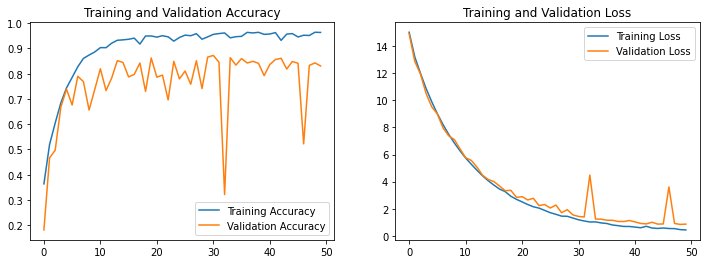

In [ ]:
plot_metrics(history_norm, epochs=50)

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



## Final Conclusion

We observe successive improvement from Model 1 to Model 3 based on the Training and validation (test) data as you can see in:

* **Model 1:** Simple CNN Model | Accuracy: 0.9431 | Validation accuracy : 0.8306
* **Model 2:** CNN Model with Dropout | Accuracy: 0.9344 | Validation accuracy : 0.8639
* **Model 3:** CNN Model with Augmented Data, Dropout and Batch Normalization | Accuracy: 0.9632 | Validation accuracy : 0.8306

We see an increment in the Validation dataset using Aumented Data and managing DRopouts and Batch Normalization. The Accuracy of the Model 2 is the best one in this experiment, but since the neural network can optimize in a local optima, in a re-training we can get a better result. The model 3 is overfiging comparing against model 2. 

As conclusion, in this experiment I showed that the CNN Model with Droponts performs better than managing Augmented Data.

### Future Word
I can improved the accuracy in the further with proper hyper-parameter. I can setup different CNN Configuration, other chose of loss function, Optimizers and Layers to test if it improves the accuracy